# Multivariate statistics

Multivariate statistics includes all statistical techniques for analyzing samples made of two or more variables.
The data set (a $N \times P$ matrix $\mathbf{X}$) is a collection of $N$ independent samples column **vectors** $[\mathbf{x}_{1}, \ldots, \mathbf{x}_{i}, \ldots, \mathbf{x}_{N}]$ of length $P$

$$
\mathbf{X} =
\begin{matrix}
[&& \mathbf{x}_{1}^T &&]\\
&&\vdots&&\\
[&&\mathbf{x}_{i}^T  &&]\\
&&\vdots&&\\
[&&\mathbf{x}_{P}^T&&]
\end{matrix}=
\begin{matrix}
[x_{11} & x_{1j} & x_{1P}]\\
        & \vdots & \\
[x_{i1} & x_{ij} & x_{iP}]\\
        & \vdots &\\
[x_{N1} & x_{Nj} &     x_{NP}]
\end{matrix}=
\begin{bmatrix}
x_{11} & \ldots     & x_{1P}\\
\vdots &            & \vdots\\
       & \mathbf{X} & \\
\vdots &            & \vdots\\       
x_{N1} & \ldots     & x_{NP}
\end{bmatrix}_{~N \times P}
$$


## Data mean vector

The column-wise mean ($P \times 1$) vector $\mathbf{\mu}$ whose estimator is
$$
\bar{\mathbf{x}} = \frac{1}{N}\sum_{i=1}^N \mathbf{x_i}=
\frac{1}{N}\sum_{i=1}^N\begin{bmatrix}
x_{i1}\\
\vdots\\
x_{ij}\\
\vdots\\
x_{iP}\\
\end{bmatrix}=
\begin{bmatrix}
\bar{x_{1}}\\
\vdots\\
\bar{x_{j}}\\
\vdots\\
\bar{x_{P}}\\
\end{bmatrix}
$$

## Data covariance matrix

- The covariance matrix $\mathbf{\Sigma_{XX}}$ is a **symmetric** positive semi definite matrix whose element in the $j, k$ position is the covariance between the $j^{th}$ and $k^{th}$ elements of a random vector ie. the $j^{th}$ and $k^{th}$ columns of $\mathbf{X}$.

- The covariance matrix generalizes the notion of covariance to multiple dimensions.

- The covariance matrix describe the shape of the sample distribution around the mean assuming assuming an elliptical distribution.

$$
\mathbf{\Sigma_{XX}} = E(\mathbf{X}-E(\mathbf{X}))^TE(\mathbf{X}-E(\mathbf{X})),
$$

whose estimator $\mathbf{S_{XX}}$ is a $P \times P$ matrix given by
$$
\mathbf{S_{XX}}= \frac{1}{N-1}(\mathbf{X}- \mathbf{1} \bar{\mathbf{x}}^T)^T (\mathbf{X}- \mathbf{1} \bar{\mathbf{x}}^T) 
$$


If we assume that $\mathbf{X}$ is centered, ie. $\mathbf{X}$ is replaced by $\mathbf{X} - \mathbf{1}\bar{\mathbf{x}}^T$ then the estimator is
$$
\mathbf{S_{XX}} = \frac{1}{N-1} \mathbf{X}^T\mathbf{X}=
\frac{1}{N-1}
\begin{bmatrix}
x_{11} & & & \ldots & & & x_{N1}\\
x_{1j} & & & \ldots & & & x_{Nj}\\
       & & & & & & \\
x_{1P} & & & \ldots & & & x_{NP}\\
\end{bmatrix}
\begin{bmatrix}
x_{11} & & x_{1k}& x_{1P}\\
       & & & \\
       & & & \\
\vdots & & \vdots & \vdots\\
       & & & \\
       & & & \\
x_{N1} & & x_{Nk}& x_{NP}
\end{bmatrix}=
\begin{bmatrix}
s_{1} & \ldots  & s_{1k} & s_{1P}\\
      & \ddots  & s_{jk} & \vdots\\
      &         & s_{k} & s_{P}\\      
      &         &        & s_{P}\\
\end{bmatrix}
$$
where 
$$
s_{jk} = s_{kj} = \frac{1}{N-1} \mathbf{x_j}^T \mathbf{x_k} = \frac{1}{N-1} \sum_{i=1}^N x_{ij} x_{ik}
$$

is an estimator of the covariance between the $j^{th}$ and $k^{th}$ variables.

In [2]:
import pystatsml.plot_utils

pystatsml.plot_utils.toto()

toto


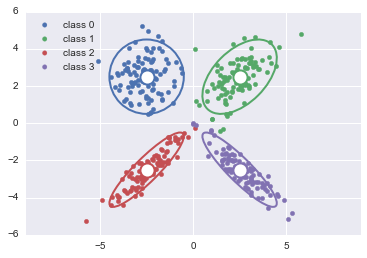

In [43]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pystatsml.plot_utils
import seaborn as sns  # nice color

%matplotlib inline
np.random.seed(42)
colors = sns.color_palette()

n_samples, n_features = 100, 2

mean, Cov, X = [None] * 4, [None] * 4, [None] * 4
mean[0] = np.array([-2.5, 2.5])
Cov[0] = np.array([[1, 0],
                   [0, 1]])

mean[1] = np.array([2.5, 2.5])
Cov[1] = np.array([[1, .5],
                   [.5, 1]])

mean[2] = np.array([-2.5, -2.5])
Cov[2] = np.array([[1, .9],
                   [.9, 1]])

mean[3] = np.array([2.5, -2.5])
Cov[3] = np.array([[1, -.9],
                   [-.9, 1]])

# Generate dataset
for i in range(len(mean)):
    X[i] = np.random.multivariate_normal(mean[i], Cov[i], n_samples)

# Plot
for i in range(len(mean)):
    # Points
    plt.scatter(X[i][:, 0], X[i][:, 1], color=colors[i], label="class %i" % i)
    # Means
    plt.scatter(mean[i][0], mean[i][1], marker="o", s=200, facecolors='w',
                edgecolors=colors[i], linewidth=2)
    # Ellipses representing the covariance matrices
    pystatsml.plot_utils.plot_cov_ellipse(Cov[i], pos=mean[i], facecolor='none',
                                          linewidth=2, edgecolor=colors[i])

plt.axis('equal')
plt.legend(loc='upper left')

## Multivariate normal distribution

multivariate normal distribution or multivariate Gaussian distribution of a $P$-dimensional random vector $\mathbf{x} = [x_1, x_2, \ldots, x_P]^T$ is

$$
\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{P/2}|\mathbf{\Sigma}|^{1/2}}\exp\{-\frac{1}{2} (\mathbf{x} - \mathbf{\mu)}^T \mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu})\}
$$

### 1. Write a basic PCA class
